In [21]:
from uncertain_dp2 import *

In [22]:
from pot_correction import *

In [23]:
import random
#random.seed(1)

In [24]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 10

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [25]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
# 0.47

In [26]:
most_likely_restorer_error_rate(reads)

[0.9142857142857143, 0.8571428571428571, 0.8285714285714286, 0.8857142857142857, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8, 0.8857142857142857, 0.8285714285714286]


0.15142857142857147

In [27]:
dna_distance_error_rate(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

[0.08571428571428572, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.17142857142857143, 0.17142857142857143, 0.2571428571428571, 0.11428571428571428, 0.17142857142857143]


0.16285714285714287

In [28]:
check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

[0.9142857142857143, 0.8571428571428571, 0.8285714285714286, 0.8857142857142857, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8, 0.8857142857142857, 0.8285714285714286]
[0.08571428571428572, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.17142857142857143, 0.17142857142857143, 0.2571428571428571, 0.11428571428571428, 0.17142857142857143]


In [29]:
reads

[<GCTTTATTGGGACGGGATGAGGAAAGGATACGCAA>,
  <CTCTATTGGGACGCTAGGAGGAAAGTATACGCATT>,
       <TTGTGACCGTGAGAGGAAAGAATACACAGTAATGT>,
           <GACGGTAAGAGGAAAGAATACTTAATAATGTATGT>,
  <GGTTATTGGGACTATAAGAGGAAAGAATGCGCAAC>,
         <CGGACGCGAAGAGGAAAGATTACGCAATAGTATTA>,
         <GAGACGGTATGAGTGAAGTATACCCAATAGTGTTT>,
            <ACGGAAAAAGGAAAGAACACACAATAGTGCACGTC>,
         <GGGACCGTCAGAGGAAAGAATTCGCAATAGTGTCT>,
            <ACCTTCAGAGGATAGAATACGCAAAAGTCTTTGTC>]

In [30]:
corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=ALIGNMENT_BONUS)
corrected_reads

[<GCTTTATTGGGACGGTAAGAGGAAAGAATACGCAA>,
  <CTTTATTGGGACGGTAAGAGGAAAGAATACGCAAT>,
       <TTGGGACGGTAAGAGGAAAGAATACGCAATAGTGT>,
           <GACGGTAAGAGGAAAGAATACGCAATAGTGTTTGT>,
  <CTTTATTGGGACGGTAAGAGGAAAGAATACGCAAT>,
         <GGGACGGTAAGAGGAAAGAATACGCAATAGTGTTT>,
         <GGGACGGTAAGAGGGAAGAATACGCAATAGTGTTT>,
            <ACGGTAAGAGGAAAGAATACGCAATAGTGTTTGTC>,
         <GGGACGGTAAGAGGAAAGAATACGCAATAGTGTTT>,
            <ACGGTAAGAGGAAAGAATACGCAATAGTGTTTGTC>]

In [31]:
DNA_LENGTH = 50           
READ_lENGTH = 35 
READ_COUNT = 10       

In [32]:
most_likely_restorer_error_rate(corrected_reads)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9714285714285714, 1.0, 1.0, 1.0]


0.0028571428571428914

In [33]:
dna_distance_error_rate(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

[0.08571428571428572, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.17142857142857143, 0.17142857142857143, 0.2571428571428571, 0.11428571428571428, 0.17142857142857143]


0.16285714285714287

In [34]:
dna_distance_error_rate(dna, corrected_reads, alignment_bonus=ALIGNMENT_BONUS)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02631578947368421, 0.0, 0.0, 0.0]


0.002577319587628866

In [35]:

before_correction = []
normal_correction = []
probabilistic_correction = []

for i in range(100):

    dna = generate_dna(DNA_LENGTH)
    reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

    corrected_reads = correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=NORMAL_ALIGNMENT_BONUS)
    probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)

    before_correction.append(dna_distance_error_rate(dna, reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    normal_correction.append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    probabilistic_correction.append(dna_distance_error_rate(dna, probabilistic_corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))

print(before_correction, normal_correction, probabilistic_correction)


[0.17142857142857143, 0.2, 0.14285714285714285, 0.08571428571428572, 0.14285714285714285, 0.08571428571428572, 0.17142857142857143, 0.11428571428571428, 0.2857142857142857, 0.2]
[0.02857142857142857, 0.044444444444444446, 0.044444444444444446, 0.0, 0.020833333333333332, 0.021739130434782608, 0.024390243902439025, 0.02564102564102564, 0.08571428571428572, 0.046511627906976744]
[0.02857142857142857, 0.046511627906976744, 0.044444444444444446, 0.0, 0.0, 0.023809523809523808, 0.0, 0.05263157894736842, 0.05555555555555555, 0.0]
[0.2, 0.22857142857142856, 0.08571428571428572, 0.14285714285714285, 0.08571428571428572, 0.14285714285714285, 0.22857142857142856, 0.22857142857142856, 0.08571428571428572, 0.14285714285714285]
[0.08108108108108109, 0.027777777777777776, 0.04878048780487805, 0.0, 0.0, 0.02040816326530612, 0.0, 0.02857142857142857, 0.0, 0.0]
[0.02702702702702703, 0.0, 0.0, 0.0, 0.0, 0.020833333333333332, 0.0, 0.02857142857142857, 0.0, 0.02631578947368421]
[0.2571428571428571, 0.11428

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<BarContainer object of 3 artists>

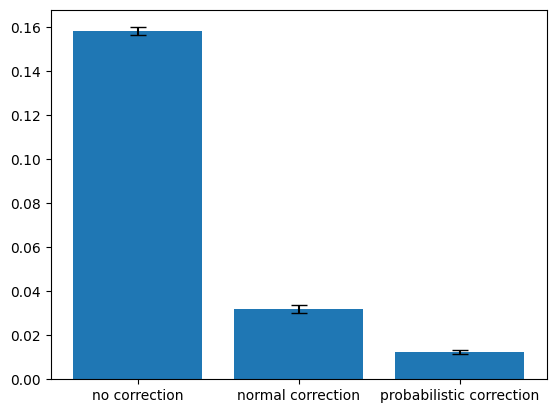

In [37]:
plt.bar(
    ["no correction", "normal correction", "probabilistic correction"],
    [np.mean(before_correction), np.mean(normal_correction), np.mean(probabilistic_correction)],
    yerr=[pd.Series(before_correction).sem(),pd.Series(normal_correction).sem(), pd.Series(probabilistic_correction).sem()],
    capsize=6
    )
#plt.ylim(0,0.02)

In [38]:
before_correction

[0.16,
 0.15714285714285714,
 0.17714285714285713,
 0.15714285714285714,
 0.17142857142857143,
 0.19142857142857142,
 0.1457142857142857,
 0.13428571428571429,
 0.16285714285714287,
 0.15142857142857144,
 0.16857142857142857,
 0.1457142857142857,
 0.11142857142857143,
 0.16,
 0.15428571428571428,
 0.14285714285714285,
 0.1657142857142857,
 0.13714285714285715,
 0.15428571428571428,
 0.1657142857142857,
 0.1742857142857143,
 0.15142857142857144,
 0.1742857142857143,
 0.14857142857142858,
 0.12285714285714286,
 0.1,
 0.1742857142857143,
 0.15142857142857144,
 0.13714285714285715,
 0.15428571428571428,
 0.1657142857142857,
 0.18285714285714286,
 0.15142857142857144,
 0.15714285714285714,
 0.16857142857142857,
 0.18857142857142858,
 0.14285714285714285,
 0.14285714285714285,
 0.1742857142857143,
 0.15428571428571428,
 0.14857142857142858,
 0.15714285714285714,
 0.17142857142857143,
 0.1457142857142857,
 0.16857142857142857,
 0.16,
 0.16285714285714287,
 0.17714285714285713,
 0.194285714285

In [39]:
# boni = [0.2,0.4,0.6,0.8,1]
# data = [[] for _ in range(len(boni))]
# 
# 
# for i in range(4):
    # dna = generate_dna(DNA_LENGTH)
    # reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
    #probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)
    # for j in range(len(boni)):
        # corrected_reads = correct_reads_with_consens(reads, probabilistic=False, alignment_bonus=boni[j])
        # data[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=boni[j]))
# 
# data

In [40]:
# plt.bar(
    # [str(b) for b in boni],
    # [np.mean(boni_data) for boni_data in data],
    # yerr=[pd.Series(boni_data).sem() for boni_data in data],
    # capsize=6
    # )